In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,SimpleRNN,LSTM,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [3]:
T=10
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
        if x[i1]<0 and x[i2]<0 and x[i3]<0:
                return 1
        if x[i1]<0 and x[i2]>0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]<0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]>0 and x[i3]<0:
                return 1 
        return 0
for t in range(5000):
        x=np.random.randn(T)
        X.append(x)
        # easy
        #y=get_label(x,-1,-2,-3)
        # hard
        y=get_label(x,0,1,2)
        Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

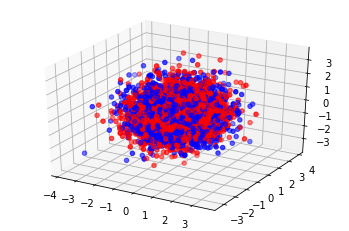

In [4]:
col = np.where(Y==1,'b','r')
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,-1],X[:,-2],X[:,-3],c=col)


plt.show()

In [9]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.01),
        loss='binary_crossentropy',
      metrics=['accuracy'])

r=model.fit(X, Y, 
            validation_split=0.5,
            epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


79/79 [==============================] - 3s 16ms/step - loss: 0.6943 - accuracy: 0.4868 - val_loss: 0.6934 - val_accuracy: 0.4964
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5072 - val_loss: 0.6937 - val_accuracy: 0.4952
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5048 - val_loss: 0.6945 - val_accuracy: 0.4944
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.5060 - val_loss: 0.6934 - val_accuracy: 0.5032
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5016 - val_loss: 0.6934 - val_accuracy: 0.4912
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.4928 - val_loss: 0.6933 - val_accuracy: 0.4912
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5048 - val_loss: 0.6932 - val_accuracy: 0.4944
Epoch 8/100
79/79 [====

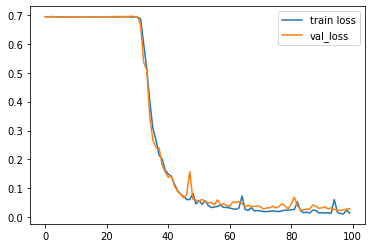

In [10]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

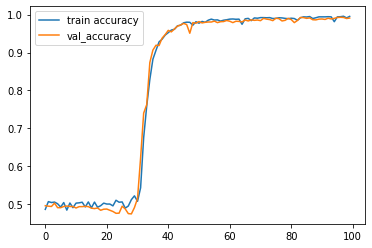

In [11]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],
label='val_accuracy')
plt.legend()

In [12]:
T=20
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
        if x[i1]<0 and x[i2]<0 and x[i3]<0:
                return 1
        if x[i1]<0 and x[i2]>0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]<0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]>0 and x[i3]<0:
                return 1 
        return 0
for t in range(5000):
        x=np.random.randn(T)
        X.append(x)
        # easy
        #y=get_label(x,-1,-2,-3)
        # hard
        y=get_label(x,0,1,2)
        Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [17]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.01),
        loss='binary_crossentropy',
      metrics=['accuracy'])

r=model.fit(X, Y, 
            validation_split=0.5,
            epochs=200)

Epoch 1/200
79/79 [==============================] - 4s 19ms/step - loss: 0.6945 - accuracy: 0.4836 - val_loss: 0.6933 - val_accuracy: 0.5048
Epoch 2/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6942 - accuracy: 0.4800 - val_loss: 0.6929 - val_accuracy: 0.5068
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5076
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5124 - val_loss: 0.6932 - val_accuracy: 0.5024
Epoch 5/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6944 - accuracy: 0.4932 - val_loss: 0.6929 - val_accuracy: 0.5008
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.4928 - val_loss: 0.6930 - val_accuracy: 0.5096
Epoch 7/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6930 - val_accuracy: 0.5060
Epoch 

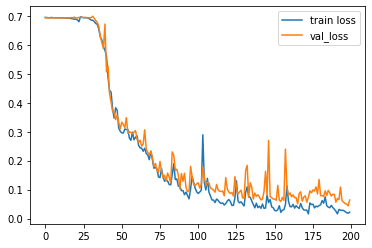

In [18]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

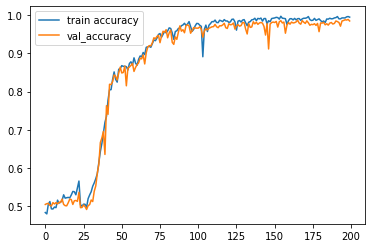

In [19]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],
label='val_accuracy')
plt.legend()

In [20]:
T=30
D=1
X=[]
Y=[]
def get_label(x,i1,i2,i3):
        if x[i1]<0 and x[i2]<0 and x[i3]<0:
                return 1
        if x[i1]<0 and x[i2]>0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]<0 and x[i3]>0:
                return 1
        if x[i1]>0 and x[i2]>0 and x[i3]<0:
                return 1 
        return 0
for t in range(5000):
        x=np.random.randn(T)
        X.append(x)
        # easy
        #y=get_label(x,-1,-2,-3)
        # hard
        y=get_label(x,0,1,2)
        Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [24]:
i=Input(shape=(T,D))
x=LSTM(5,return_sequences=True)(i)
x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.01),
        loss='binary_crossentropy',
      metrics=['accuracy'])

r=model.fit(X, Y, 
            validation_split=0.5,
            epochs=100)

Epoch 1/100
79/79 [==============================] - 4s 23ms/step - loss: 0.6937 - accuracy: 0.5008 - val_loss: 0.6934 - val_accuracy: 0.5048
Epoch 2/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.4844 - val_loss: 0.6929 - val_accuracy: 0.5056
Epoch 3/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.5088 - val_loss: 0.6929 - val_accuracy: 0.5008
Epoch 4/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6929 - val_accuracy: 0.4964
Epoch 5/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6935 - accuracy: 0.5048 - val_loss: 0.6930 - val_accuracy: 0.5224
Epoch 6/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5044 - val_loss: 0.6927 - val_accuracy: 0.5036
Epoch 7/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6925 - accuracy: 0.5276 - val_loss: 0.6939 - val_accuracy: 0.5044
Epoch 

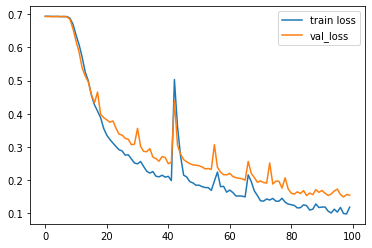

In [25]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

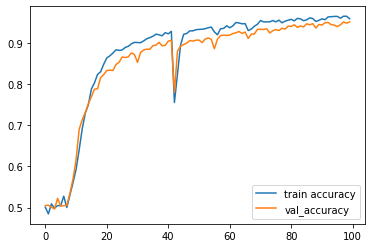

In [26]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],
label='val_accuracy')
plt.legend()